## Import Required Libraries

In [64]:
import pandas as pd

In [65]:
df = pd.read_csv("spotify.csv")
df.sample(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1001,7KVogt1437zlFZzsP0srqs,We Are The Greatest,Keanu Silva,45,5eJdNPFlvr81Kc57VNmbKo,We Are The Greatest,2019-06-13,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,1,-4.064,0,0.062,0.0496,0.000002,0.587,0.461,126.038,185064
24457,3H4xY3vJdvjlTtq1YUv0gu,Honey Dip,Portrait,23,6DKXPsDRHLJeGDqjSnVNFi,Portrait,1992-01-01,New Jack City,6RLvj5OnEuPzI1P02KwnzK,r&b,...,1,-10.107,0,0.103,0.0187,0.057500,0.341,0.911,208.209,242893
25126,76HKOVWqsEg26SECtmw7Rz,The Way You Make Me Feel - 2012 Remaster,Michael Jackson,51,3Us57CjssWnHjTUIXBuIeH,Bad (Remastered),1987-08-31,1987-1997 OLD SKOOL JAMZ,0WicovBbxeB0nvQC6IfuaT,r&b,...,1,-4.523,1,0.147,0.0544,0.000055,0.144,0.540,114.472,298120


##  Preperocesing and EDA

### Basic EDA

In [66]:
df.shape

(32833, 23)

In [67]:
df.duplicated().value_counts(0)

False    32833
Name: count, dtype: int64

In [68]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [69]:
df = df.dropna()

In [70]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [71]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

#### Take only year from Date feature

In [72]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format='mixed').dt.year

In [73]:
unq_infp = []
for col in df.columns:
    unq_infp.append([col, type(df[col][0]), len(df[col].unique())])

pd.DataFrame(sorted(unq_infp, key=lambda x: x[2]))

,0,1,2
0,mode,<class 'numpy.int64'>,2
1,playlist_genre,<class 'str'>,6
2,key,<class 'numpy.int64'>,12
3,playlist_subgenre,<class 'str'>,24
4,track_album_release_date,<class 'numpy.int32'>,63
5,track_popularity,<class 'numpy.int64'>,101
6,playlist_name,<class 'str'>,449
7,playlist_id,<class 'str'>,471
8,danceability,<class 'numpy.float64'>,822
9,energy,<class 'numpy.float64'>,952


# <a id='toc1_'></a>[EDA](#toc0_)

### <a id='toc1_1_1_'></a>[Playlist Genre](#toc0_)

In [74]:
print(len(df['playlist_genre'].unique()), len(df['playlist_subgenre'].unique()), len(set(list(df['playlist_genre'] + "/" + df['playlist_subgenre']))))

6 24 24


As we can observe here that playlist_subgenre can independepntly represent both playlist_subgenre and playlist_genre, so we will drop playlist_genre.


And 24 column will increase if we vectorize them, so will give them unique integer values.

In [75]:
df['playlist_subgenre'], _ = pd.factorize(df['playlist_subgenre'])
df = df.drop(columns=['playlist_genre'])

### <a id='toc1_1_2_'></a>[Playlist Name and ID](#toc0_)


playlist_name and playlist_id represent the same feature, so we will combine them.

In [76]:
df['playlist'] = df["playlist_name"] + df["playlist_id"]
df = df.drop(columns=['playlist_name', 'playlist_id'])

playlist is a categorical feature, will try to reduce the number of unique entrie

In [77]:
for i in range(0, 101, 10):
    print(i, "\t", (df['playlist'].value_counts()>i).sum())

0 	 471
10 	 460
20 	 435
30 	 413
40 	 396
50 	 320
60 	 287
70 	 247
80 	 208
90 	 160
100 	 6


### <a id='toc1_1_2_1_'></a>[Rename playlist name will less than 100 occurences](#toc0_)

In [78]:
pl_frequency = df['playlist'].value_counts()
pl_top_5 = pl_frequency[pl_frequency > 100].index.tolist()
pl_top_5

['2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥4JkkvMpVl4lSioqQjeAL0q',
 'Ultimate Indie Presents... Best Indie Tracks of the 2010s37i9dQZF1DWTHM4kX49UKs',
 'Fitness Workout Electro | House | Dance | Progressive House6KnQDwp0syvhfHOR4lWP7x',
 'Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Pop 2020🔥Popular Music🔥Clean Pop 2020🔥Sing Alongs3xMQTDLOIGvj3lWH5e5x6F',
 'Classic Rock 70s 80s 90s, Rock Classics - 70s Rock, 80s Rock, 90s Rock Rock  Classicos3Ho3iO0iJykgEQNbjB2sic',
 'EDM 2020 House & Dance25ButZrVb1Zj1MJioMs09D']

In [79]:
df['playlist'] = df['playlist'].apply(lambda x: "Others" if x not in pl_top_5 else x)

In [80]:
track_dict = {}
track_dict['playlist'] = pl_top_5

artist is a categorical feature, will try to reduce the number of unique entrie

In [81]:
for i in range(0, 101, 10):
    print(i, "\t", (df['track_artist'].value_counts()>i).sum())

0 	 10692
10 	 536
20 	 202
30 	 97
40 	 63
50 	 35
60 	 24
70 	 15
80 	 10
90 	 8
100 	 5


### <a id='toc1_1_2_2_'></a>[Rename artists name with less than 100 occurences as Others](#toc0_)

In [82]:
art_frequency = df['track_artist'].value_counts()
art_top_5 = art_frequency[art_frequency > 100].index.tolist()
art_top_5

['Martin Garrix', 'Queen', 'The Chainsmokers', 'David Guetta', 'Don Omar']

In [83]:
df['track_artist'] = df['track_artist'].apply(lambda x: "Others" if x not in art_top_5 else x)

In [84]:
track_dict['track_artist'] = art_top_5

### <a id='toc1_1_2_3_'></a>[Drop columns that alsmost have unique values](#toc0_)

In [85]:
df = df.drop(columns=['track_id', 'track_name', 'track_album_id', 'track_album_name'])

### <a id='toc1_1_2_4_'></a>[Vectorize remaining Categorical Features](#toc0_)

In [86]:
def convert_c_n(df, track_dict):

    temp_df = df.copy()

    for key in track_dict.keys():
        for col in track_dict[key]:
            temp_df[f"{key}__{col}"] = list(temp_df[key] != col)
            temp_df[f"{key}__{col}"] = temp_df[f"{key}__{col}"].astype(int)
        temp_df = temp_df.drop(columns = [key])
        print(key)

    return temp_df
            

In [87]:
df = convert_c_n(df, track_dict)

playlist
track_artist


In [88]:
type(df)

pandas.core.frame.DataFrame

## <a id='toc1_2_'></a>[Final Dataset](#toc0_)

In [89]:
df.sample(5)

,track_popularity,track_album_release_date,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,playlist__Ultimate Indie Presents... Best Indie Tracks of the 2010s37i9dQZF1DWTHM4kX49UKs,playlist__Fitness Workout Electro | House | Dance | Progressive House6KnQDwp0syvhfHOR4lWP7x,playlist__Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Pop 2020🔥Popular Music🔥Clean Pop 2020🔥Sing Alongs3xMQTDLOIGvj3lWH5e5x6F,"playlist__Classic Rock 70s 80s 90s, Rock Classics - 70s Rock, 80s Rock, 90s Rock Rock Classicos3Ho3iO0iJykgEQNbjB2sic",playlist__EDM 2020 House & Dance25ButZrVb1Zj1MJioMs09D,track_artist__Martin Garrix,track_artist__Queen,track_artist__The Chainsmokers,track_artist__David Guetta,track_artist__Don Omar
12432,78,1976,9,0.377,0.682,7,-8.039,1,0.0299,0.000894,...,1,1,1,1,1,1,1,1,1,1
4523,77,2016,3,0.573,0.739,0,-5.740,1,0.1290,0.028500,...,1,1,1,1,1,1,1,1,1,1
20872,45,2019,15,0.806,0.521,5,-5.438,0,0.2880,0.013500,...,1,1,1,1,1,1,1,1,1,1
26009,9,2001,19,0.639,0.690,7,-10.047,1,0.2640,0.026500,...,1,1,1,1,1,1,1,1,1,1
23004,59,2019,17,0.730,0.344,10,-9.541,0,0.0394,0.138000,...,1,1,1,1,1,1,1,1,1,1


In [90]:
print(df.dtypes)


track_popularity                                                                                                                   int64
track_album_release_date                                                                                                           int32
playlist_subgenre                                                                                                                  int64
danceability                                                                                                                     float64
energy                                                                                                                           float64
key                                                                                                                                int64
loudness                                                                                                                         float64
mode                                     

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 26 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                         --------------  -----  
 0   track_popularity                                                                                                               32828 non-null  int64  
 1   track_album_release_date                                                                                                       32828 non-null  int32  
 2   playlist_subgenre                                                                                                              32828 non-null  int64  
 3   danceability                                                                                                   

## <a id='toc1_3_'></a>[Train](#toc0_)

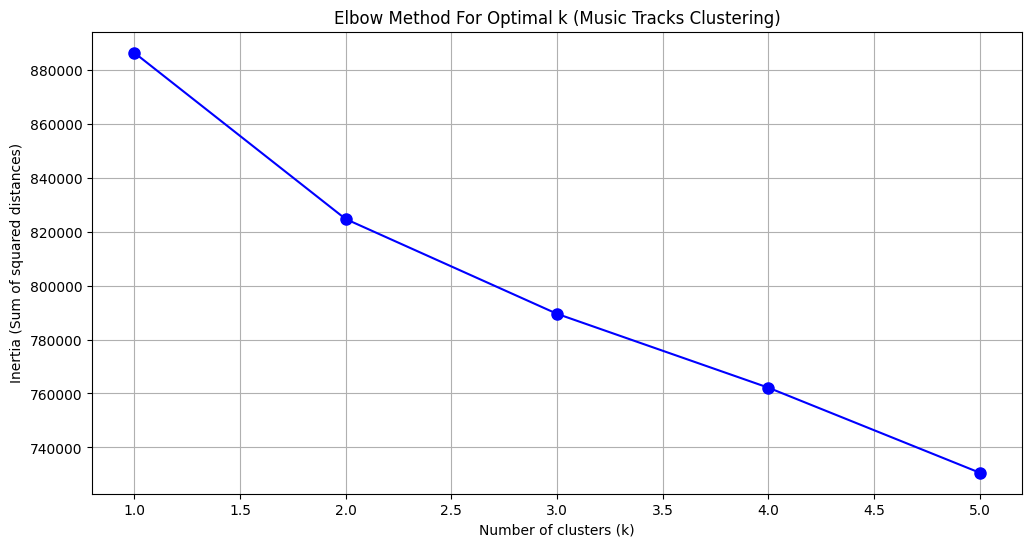

Inertias for k=1 to k=20:
[886355.9999999998, 824690.5159908631, 789542.1742602973, 762148.2086098648, 730619.5800895143]


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def initialize_centroids(X, k):
    """Randomly initialize k centroids from the data points."""
    np.random.seed(42)
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_indices]
    return centroids

def compute_distances(X, centroids):
    """Compute the Euclidean distance between each point and each centroid."""
    distances = np.sqrt(((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))
    return distances

def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids by calculating the mean of all points in each cluster."""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def compute_inertia(X, centroids, labels):
    """Calculate the sum of squared distances from each point to its assigned centroid."""
    return np.sum((X - centroids[labels]) ** 2)

def kmeans(X, k, max_iters=100, tol=1e-4):
    """Perform k-means clustering."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids
    inertia = compute_inertia(X, centroids, labels)
    return centroids, labels, inertia

def plot_elbow_method(df, max_k=10):
    """Plot the elbow method to find the optimal number of clusters."""

    # Use all columns as features
    features = df.columns.tolist()

    # Prepare the data
    X = df[features]

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)


    inertias = []
    for k in range(1, max_k + 1):
        _, _, inertia = kmeans(X, k)
        inertias.append(inertia)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, max_k + 1), inertias, 'bo-', markersize=8)
    plt.title('Elbow Method For Optimal k (Music Tracks Clustering)')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Sum of squared distances)')
    plt.grid(True)
    plt.show()

    return inertias

def plot_clusters_3d(X, labels, centroids, feature_names):
    """
    Plot the clusters in 3D space using the given features.
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               color='red', marker='x', s=200, linewidths=3)
    
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.set_title('3D Cluster Visualization')
    
    plt.colorbar(scatter)
    plt.show()


# Main execution
try:
    # Plot the elbow method to determine the optimal number of clusters
    inertias = plot_elbow_method(df, max_k=5)
    print("Inertias for k=1 to k=20:")
    print(inertias)

#     # Perform clustering with the optimal k (let's say k=5 for this example)
#     optimal_k = 5  # You should choose this based on the elbow plot
#     centroids, labels, inertia = kmeans(X_scaled, optimal_k)

#     # Add cluster labels to the original dataframe
#     df['cluster'] = labels

#     # Print summary statistics for each cluster
#     for i in range(optimal_k):
#         print(f"\nCluster {i} Summary:")
#         cluster_data = df[df['cluster'] == i]
#         print(cluster_data[features].describe())

#     # Perform PCA for visualization
#     pca = PCA(n_components=3)
#     X_pca = pca.fit_transform(X_scaled)
#     centroids_pca = pca.transform(centroids)

#     # Visualize clusters in 3D using PCA components
#     plot_clusters_3d(X_pca, labels, centroids_pca, [f'PC{i+1}' for i in range(3)])

#     # Create multiple 3D plots with different feature combinations
#     feature_combinations = [
#         ('danceability', 'energy', 'valence'),
#         ('acousticness', 'instrumentalness', 'liveness'),
#         ('tempo', 'loudness', 'speechiness'),
#         ('track_popularity', 'danceability', 'energy')
#     ]

#     for combo in feature_combinations:
#         try:
#             indices = [features.index(f) for f in combo]
#             X_subset = X_scaled[:, indices]
#             centroids_subset = centroids[:, indices]
#             plot_clusters_3d(X_subset, labels, centroids_subset, combo)
#         except ValueError as e:
#             print(f"Skipping combination {combo}: {str(e)}")

#     # Print feature importance based on PCA
#     feature_importance = pd.DataFrame({
#         'feature': features,
#         'importance': np.sum(np.abs(pca.components_), axis=0)
#     })
#     feature_importance = feature_importance.sort_values('importance', ascending=False)
#     print("\nFeature Importance based on PCA:")
#     print(feature_importance)

except Exception as e:
    print(f"An error occurred during the analysis: {str(e)}")

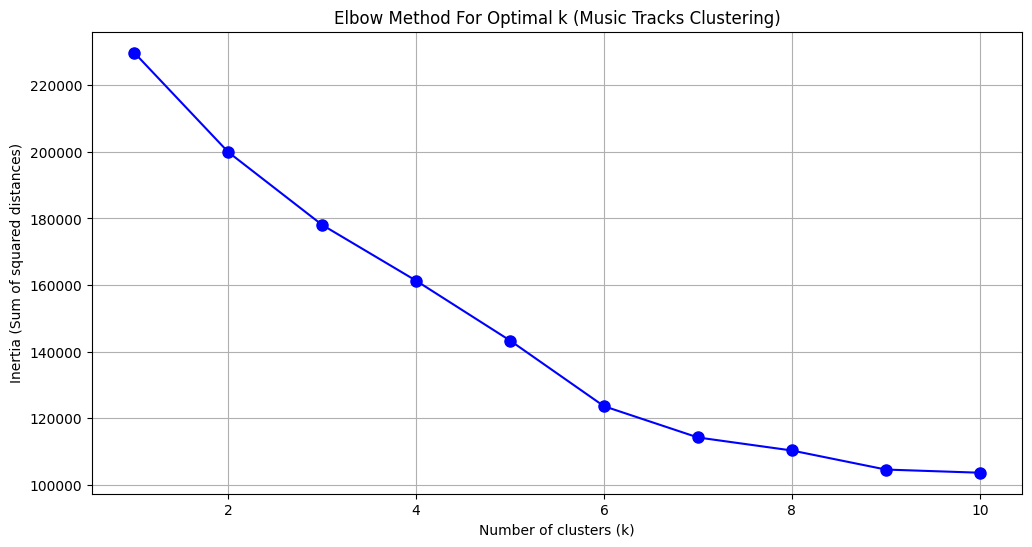

Inertias for k=1 to k=20:
[229795.99999999997, 199949.88253030012, 178062.1431787446, 161304.51129257958, 143329.11624616524, 123599.44421617246, 114208.50539832059, 110296.86088109206, 104572.41808548654, 103619.44329315814]


In [111]:
inertias = plot_elbow_method(df[[
                                # 'track_id',
                                #  'track_name',
                                #  'track_artist',
                                #  'track_popularity',
                                #  'track_album_id',
                                #  'track_album_name',
                                #  'track_album_release_date',
                                #  'playlist_name',
                                #  'playlist_id',
                                #  'playlist_genre',
                                #  'playlist_subgenre',
                                #  'danceability',
                                #  'energy',
                                #  'key',
                                 'loudness',
                                #  'mode',
                                 'speechiness',[]
                                 'acousticness',
                                 'instrumentalness',
                                 'liveness',
                                 'valence',
                                # 'duration_ms']
                                 'tempo']], max_k=10)
print("Inertias for k=1 to k=20:")
print(inertias)

In [98]:
X_scaled

array([[ 0.9414075 ,  0.68866085, -1.65280849, ...,  0.06132612,
         0.05798331,  0.0558282 ],
       [ 0.98143937,  0.68866085, -1.65280849, ...,  0.06132612,
         0.05798331,  0.0558282 ],
       [ 1.10153499,  0.68866085, -1.65280849, ...,  0.06132612,
         0.05798331,  0.0558282 ],
       ...,
       [-1.14024986,  0.25075779,  1.59894028, ...,  0.06132612,
         0.05798331,  0.0558282 ],
       [-1.10021799,  0.25075779,  1.59894028, ...,  0.06132612,
         0.05798331,  0.0558282 ],
       [-0.61983552,  0.25075779,  1.59894028, ...,  0.06132612,
         0.05798331,  0.0558282 ]])

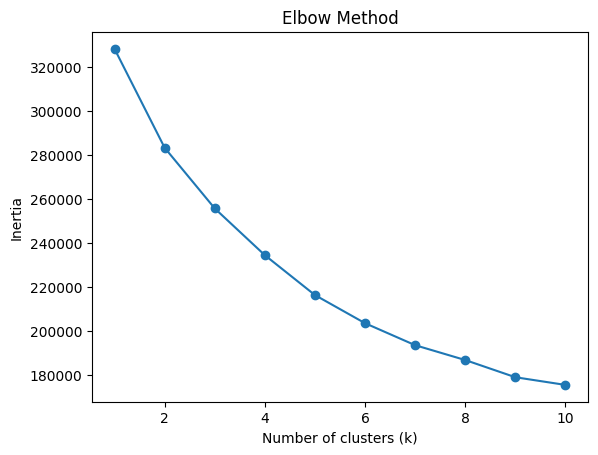

         danceability    energy   loudness  speechiness  acousticness  \
Cluster                                                                 
0            0.735581  0.724892  -6.181291     0.074145      0.139506   
1            0.602671  0.429140 -10.445436     0.072504      0.509289   
2            0.723541  0.668508  -6.791660     0.311312      0.180709   
3            0.540372  0.802365  -5.281966     0.073733      0.066410   
4            0.661182  0.785452  -6.949164     0.071415      0.071731   

         instrumentalness  liveness   valence       tempo    duration_ms  
Cluster                                                                   
0                0.014168  0.154812  0.665942  114.270394  220957.290336  
1                0.089619  0.156282  0.392706  112.609808  227583.785700  
2                0.010576  0.202898  0.548838  122.331250  217778.277119  
3                0.024837  0.248959  0.387337  132.063269  227861.375697  
4                0.740407  0.188412  0

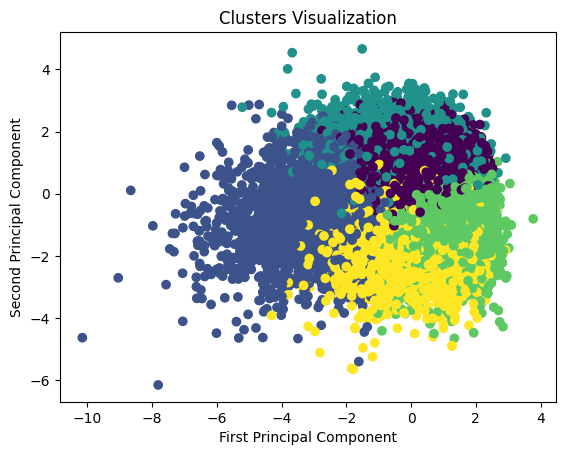

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('spotify.csv')

# Select features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(data[features])

# Find optimal K (elbow method)
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-means with optimal K
optimal_k = 5  # Replace with your optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add cluster labels to original dataframe
data['Cluster'] = clusters

# Analyze results
print(data.groupby('Cluster')[features].mean())

# Visualize (using PCA for 2D representation)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_features)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters Visualization')
plt.show()